I want to look at what happens when Tweets trend. Where are the nodes that use the hashtag in the network? 

In [3]:
import graph_tool.all as gt
import preprocessing
from config import TRENDS_DIR
%load_ext autoreload
%autoreload 2
import pandas as pd
import tqdm
import gzip
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, date, timedelta
from config import TWITTER_DATA_DIR, FOLLOWER_DATA_DIR
import pickle
import seaborn as sns
import statsmodels.formula.api as smf
from tqdm.notebook import tqdm
import graphviz as gr
import warnings
import network_plots
import numpy as np
from trending import build_df, get_trend_behavior
warnings.filterwarnings('ignore')
import trending

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
campaigns = preprocessing.load_campaign()

In [5]:
hashtag = 'jharkhandwithmodi'
tweets = campaigns[hashtag]

In [6]:
with open(os.path.join(TWITTER_DATA_DIR, 'exposure_results.pkl'), 'rb') as f:
    exposures = pickle.load(f)

In [10]:
dfs = []
for hashtag, tweets in tqdm(campaigns.items()):
    if hashtag not in preprocessing.bandwagon_hashtags and hashtag not in preprocessing.never_trended:
        _, df = trending.build_df(hashtag, tweets, exposures,
                                  raw_df_too=True, include_missing=False)
        dfs.append(df)
panel_df = pd.concat(dfs)
panel_df.head()

username                   id   retweet_from  \
adj_date                                                                 
2019-09-12 11:57:01    bjp4latehar  1172033856607682560                  
2019-09-12 16:52:28      vjay21788  1172108207499558912   ommathur_bjp   
2019-02-17 15:16:25       vagrawa3  1097069751128358914                  
2019-09-12 15:17:32  ashishmerkhed  1172084320225263619      bjp4india   
2019-02-17 18:01:30     manishkbjp  1097111295562678276  bjp4jharkhand   

                                                              template  \
adj_date                                                                 
2019-09-12 11:57:01                                                      
2019-09-12 16:52:28                                                      
2019-02-17 15:16:25  प्रधानमंत्री @narendramodi  ने स्वच्छ भारत के ...   
2019-09-12 15:17:32                                                      
2019-02-17 18:01:30  2014 तक हायर सेकेंडरी स्कूलों की संख्या 653 थी...   

                              retweet_id  \
adj_date                                   
2019-09-12 11:57:01                        
2019-09-12 16:52:28  1172063209785741312   
2019-02-17 15:16:25                        
2019-09-12 15:17:32  1172082904316334080   
2019-02-17 18:01:30  1097067864467550208   

                                                                  text  \
adj_date                                                                 
2019-09-12 11:57:01  आधारभूत संरचना हो या शिक्षा या फिर स्वच्छता या...   
2019-09-12 16:52:28  rt @ommathur_bjp: #bharatmatakijai भारत माता क...   
2019-02-17 15:16:25  प्रधानमंत्री @narendramodi  ने स्वच्छ भारत के ...   
2019-09-12 15:17:32  rt @bjp4india: चुनाव के समय मैंने आपसे कामदार ...   
2019-02-17 18:01:30  rt @bjp4jharkhand: 2014 तक हायर सेकेंडरी स्कूल...   

                                   date retweets favorites  \
adj_date                                                     
2019-09-12 11:57:01 2019-09-12 06:27:01        0         0   
2019-09-12 16:52:28 2019-09-12 11:22:28      140         0   
2019-02-17 15:16:25 2019-02-17 09:46:25        0         0   
2019-09-12 15:17:32 2019-09-12 09:47:32      456         0   
2019-02-17 18:01:30 2019-02-17 12:31:30        6        14   

                               adj_date              type follower_data  \
adj_date                                                                  
2019-09-12 11:57:01 2019-09-12 11:57:01           regular          True   
2019-09-12 16:52:28 2019-09-12 16:52:28   regular_retweet          True   
2019-02-17 15:16:25 2019-02-17 15:16:25          template          True   
2019-09-12 15:17:32 2019-09-12 15:17:32   regular_retweet          True   
2019-02-17 18:01:30 2019-02-17 18:01:30  template_retweet          True   

                    template_exposure normal_exposure total_exposure  \
adj_date                                                               
2019-09-12 11:57:01               151              64            215   
2019-09-12 16:52:28               146             271            417   
2019-02-17 15:16:25                 5              10             15   
2019-09-12 15:17:32                59              60            119   
2019-02-17 18:01:30               218              53            271   

                         trending_start inferred_trending_start  \
adj_date                                                          
2019-09-12 11:57:01 2019-02-17 15:30:00     2019-02-17 14:20:00   
2019-09-12 16:52:28 2019-02-17 15:30:00     2019-02-17 14:20:00   
2019-02-17 15:16:25 2019-02-17 15:30:00     2019-02-17 14:20:00   
2019-09-12 15:17:32 2019-02-17 15:30:00     2019-02-17 14:20:00   
2019-02-17 18:01:30 2019-02-17 15:30:00     2019-02-17 14:20:00   

                               hashtag  
adj_date                                
2019-09-12 11:57:01  jharkhandwithmodi  
2019-09-12 16:52:28  jharkhandwithmodi  
2019-02-17 15:16:25  jharkhandwithmodi  
2019-09-12 15:17:32

In [11]:
users = panel_df.query('type != "regular_retweet" and type != "template_retweet"').username.unique()

In [13]:
len(users)

18716

In [7]:
g = network_plots.load_follower_network()

In [16]:
16635*16634

276706590

In [27]:
t = network_plots.filter_nodes(g, users, 
                 include_neighborhood=False, max_neighbors=1000,
                 largest_component=False)
t

should be this many users 18716


<GraphView object, directed, with 18716 vertices and 3019926 edges, 3 internal vertex properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2aab24dbb5b0, at 0x2aab24da2970>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2aab24dbb5b0, at 0x2aab24dbbca0>, False), at 0x2aab24dbb5b0>

In [28]:
x = gt.label_components(t)

In [35]:
for x in x[1]:
    if x > 1:
        print(x)

2
2
16635
3
2
2
3
7
3
2
2
2
2
2
2
3
3
2
2
2
3
2
4
2
2


In [33]:
len(x[1])

2045

(array([2.044e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.66440e+03, 3.32780e+03, 4.99120e+03, 6.65460e+03,
        8.31800e+03, 9.98140e+03, 1.16448e+04, 1.33082e+04, 1.49716e+04,
        1.66350e+04]),
 <BarContainer object of 10 artists>)

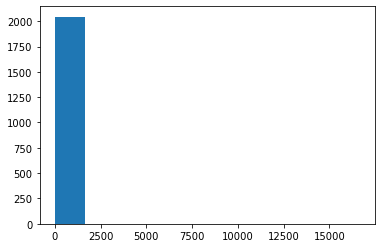

In [30]:
plt.hist(x[1])

In [22]:
t.purge_vertices()

In [23]:
t

<GraphView object, directed, with 16635 vertices and 2889857 edges, 3 internal vertex properties, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x2aab24d9cdf0, at 0x2aab24d9c760>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x2aab24d9cdf0, at 0x2aab24d9cbe0>, False), at 0x2aab24d9cdf0>

In [25]:
colors = t.new_vertex_property('string')
descriptions = {'normal': 'white',
               'zero-exposure-pre-trending': 'red',
               'zero-exposure-post-trending': 'blue',
               'template-participant': 'green',
               'exposed-regular': 'm'}
for v in t.vertices():
    colors[v] = descriptions[g.vp.descriptions[v]]

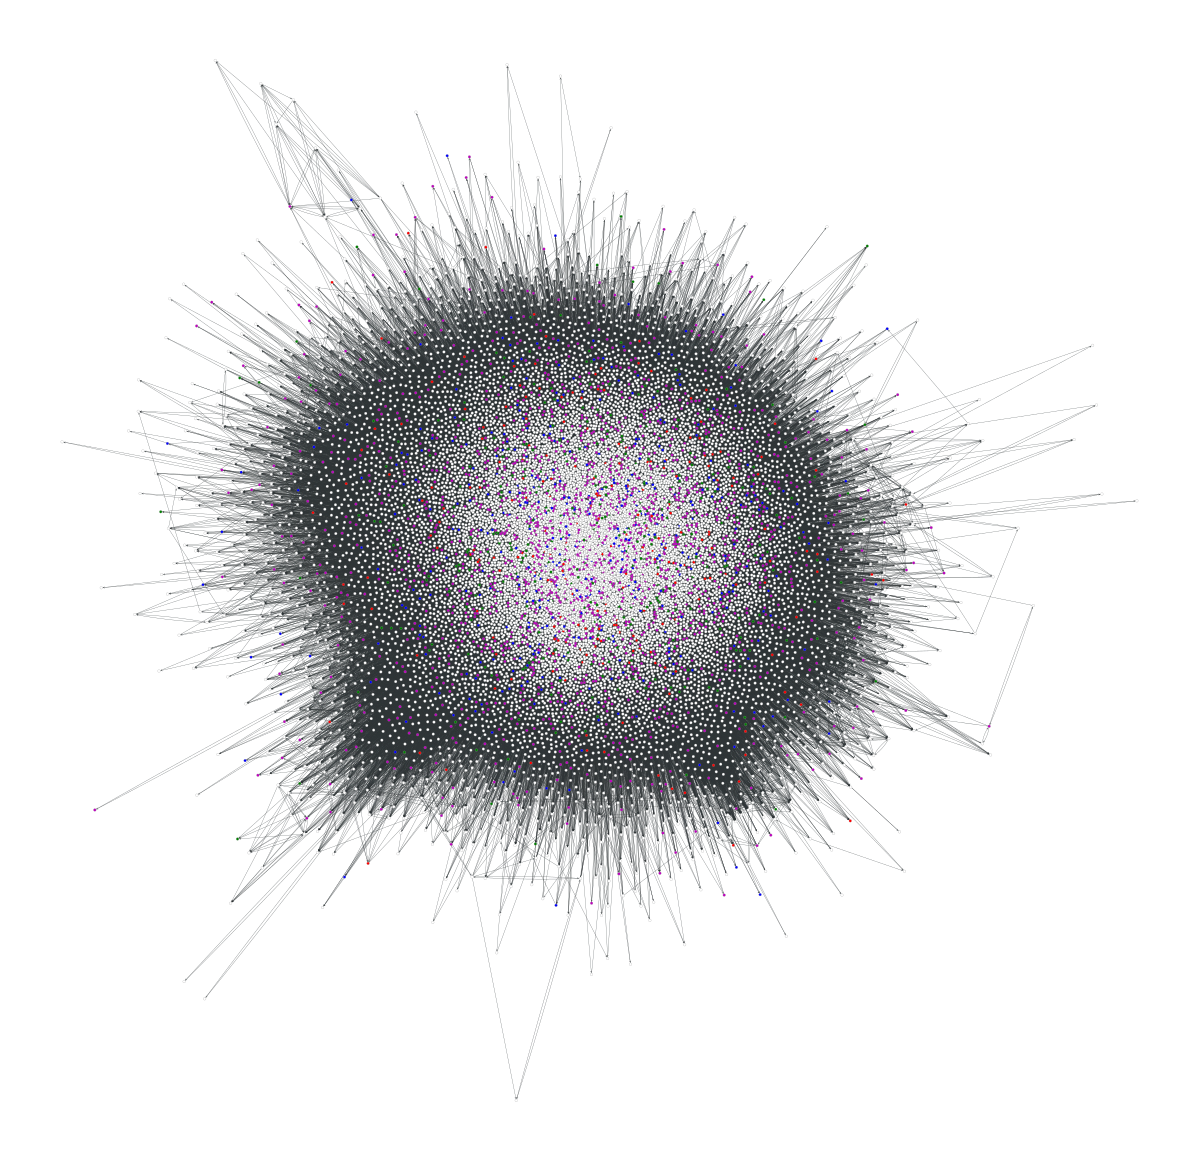

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x2aab24d9cdf0, at 0x2aab24dcde20>

In [26]:
gt.graph_draw(t, vertex_fill_color=colors)

In [8]:
g

<Graph object, directed, with 115597 vertices and 27187816 edges, 3 internal vertex properties, at 0x2aaaf9508d30>

In [ ]:
g.vp.des

In [9]:
g.vp

{'usernames': <VertexPropertyMap object with value type 'string', for Graph 0x2aaaf9508d30, at 0x2aaaf9506df0>, 'descriptions': <VertexPropertyMap object with value type 'string', for Graph 0x2aaaf9508d30, at 0x2aaaf95068e0>, 'n_campaigns': <VertexPropertyMap object with value type 'int32_t', for Graph 0x2aaaf9508d30, at 0x2aaaf9506730>}

In [ ]:
l = graph_tool.util.find_vertex(g, g.vp.descriptions, 'zero')

## What are these tweets like?

In [36]:
zero_exposure_tweeters = panel_df.query('total_exposure == 0').query('type == "regular"') \
.query('adj_date > inferred_trending_start')

In [41]:
zero_exposure_tweeters.text.apply(lambda x: print(x, '\n'))

pm मोदी ने रविवार को हजारीबाग में झारखंड को कई सौगातें दी हैं।पीएम मोदी ने भारत माता की जय से अपना संबोधन शुरू किया। बोले, भगवान बिरसा मुंडा की कर्मभूमि को जोहार। भीड़ देखकर बोले, हर बार पहले की रैली का रिकॉर्ड टूट जाता है। #jharkhandwithmodi https://www. jagran.com/jharkhand/haza ribagh-pm-narendra-modi-in-jharkhand-18959341.html … 

प्रधानमंत्री श्री @narendramodi के 12 सितम्बर 2019 को झारखंड में सार्वजनिक कार्यक्रम। लाइव देखें • https://t.co/vpp0minui4 • https://t.co/krgm5idrux • https://t.co/jtwd1z6ske #jharkhandwithmodi https://t.co/oj23dund3b 

आज यहां आदिवासी बच्चों की शिक्षा और उनके कौशल को निखारने के लिए देशभर में 462 एकलव्य मॉडल आवासीय स्कूल बनाने के अभियान का शुभारंभ हुआ है। इन स्कूलों में आदिवासी बच्चों की पढ़ाई-लिखाई के साथ-साथ sports और skill development के लिए भी सुविधाएं होंगी: पीएम #jharkhandwithmodi 

मैंने कहा था कि नई सरकार बनते ही पीएम किसान सम्मान निधि का लाभ हर किसान परिवार को मिलेगा। ये वादा पूरा हो चुका है। आज देश के लगभग 6.50 करोड़ किसान परिवारों के खाते में 2

@1stindianews @bjp4india @amitshah जीतेगी भाजपा, जीतेगा विकास। जीतेगा राजस्थान।। राजस्थान में विकास की गति को बनाये रखने के लिए, प्रदेश के देश के विकास के साथ कंधे से कंधा मिलाकर चलने के लिए आगामी 7 तारीख को भाजपा को वोट दें। #म्हारा_वोट_भाजपा_को @bjp4rajasthan @vasundharabjp 

भारतीय जनता पार्टी के पक्ष में आपके सहयोग और समर्थन के साथ राजस्थान की जनता का मतदान यहां के सुनहरे भविष्य को सुनिश्चित करेगा और यहां पर फिर से एक बार विकास को गति देने वाली सरकार बनेगी। ऐसा मुझे भरोसा है- श्री @amitshah , राष्ट्रीय अध्यक्ष #म्हारा_वोट_भाजपा_को pic.twitter.com/mvqvu3izrs 

बहुत हुई जुमलों के वॉर अबकी बार फिरसे बीजेपी सरकार। #govotebjp #bhajpaphirse #phirrserajemodi #कमल_संग_राजस्थान #म्हारा_वोट_भाजपा_को #rajephirse #rajasthanchahebjp 

#म्हारा_वोट_भाजपा_को #kamalkakamaal https://t.co/gcmdfbwfyj 

#israelicrimes #israel #gaza_under_attack #gazastrip #gaza #म्हारा_वोट_भाजपा_को #uritrailer #maari2trailer #urisurgicalstrike #gsat11 #5aralıkdünyakadınhaklarıgünü #felizmiércoles #wednesdaywisdom cardi


सबरीमाला में महिलाओं के प्रवेश को लेकर माहौल तनावपूर्ण #huaweimate20 #youtubedown hasin jahan#hbdnarendrasharma #wednesdaywisdom #durgaashtami nilakkal #congressdefencescams fateh kadal #annaburns https://t.co/ww8zjbx3hv 

let's see who started the journey of #scams. this is what there legacy is, are you really want them in power? #shameoncongress and their fellow leaders too #ashokgehlot #sachinpilot #congressmuktbharat #clownprince #congressdefencescams #rajasthanassemblyelection2018 https://t.co/myo4xxhaqh 

rt nehakak5 "जीप घोटाला तब हुआ था जब मेनन लंदन में भारतीय उच्चायुक्त थे. कश्मीर में पाकिस्तानी घुसपैठ की घटना की पृष्ठभूमि में ब्रिटेन से भारतीय सेना के लिए अत्यंत जरूरी जीप और हथियार खरीदने का भार कृष्ण मेनन को सौंपा गया था. #congressdefencescams https://t.co/jtzduja3qd" 

...वन मंत्री को कैबिनेट और डीएम पौड़ी का ठेंगा #huaweimate20 #youtubedown hasin jahan#hbdnarendrasharma #wednesdaywisdom #durgaashtami nilakkal #congressdefencescams fateh kadal #annaburns https://t.co/wp5a1

भाजपा सरकार ने ओडिशा के विकास के लिए ढेर सारे काम किये हैं। dmf के अंतर्गत 6,000 हजार करोड़ रुपये, 1600 करोड़ का iisc यहां देने का काम भाजपा की सरकार ने किया है: श्री अमित शाह #indiabolemodidobara 

गली गली में शोर है, चोकीदारनी चोर है। #mahavirjayanti congress president #indiabolemodidobara #jananayakanrahulgandhi https://t.co/uz9tpigtl5 

many countries have conferred our pm narendra modi ji with their highest civilian awards. it is not only an acknowledgement of the great work being done by our pm but also an honour for every citizen of india. #indiabolemodidobara 

मैंगलुरु रैली में उमड़े जन सैलाब को देख प्रधानमंत्री मोदी हुए स्तब्ध https://t.co/crlfnyuiad #indiabolemodidobara via namo app https://t.co/4r7otvnc6x 

ગરીબો માટે ઘર બનાવવાનું હોય, ગેસ કનેક્શન આપવાના હોય કે ઘરે ઘરે વીજળી પહોંચાડવાની હોય અમારી સરકારે ભરપૂર પ્રયાસો કર્યા છે. : પ્રધાનમંત્રી શ્રી @narendramodi #indiabolemodidobara https://t.co/jeodrxxoax 

मुस्लिम समाज का तुष्टिकरण और नफ़रत की राजनीति कर मात्र वोट बैंक के ल

#लक्ष्य_हमारा_मोदी_दोबारा https://t.co/eqxqwpibuz 

@narendramodi @citiznmukherjee चाहिए विकास आज और कल, चुनेंगे हम कमल। #लक्ष्य_हमारा_मोदी_दोबारा 

घर में बैठकर गालियाँ देने से आतंकवादी नहीं मरा करते बाहर निकलकर bjp को वोट देना पड़ता है #लक्ष्य_हमारा_मोदी_दोबारा 🤩🤩🤩🤩 https://t.co/jagd7zqt1r 

चौकीदार चौकन्ना है🚩🚩 #लक्ष्य_हमारा_मोदी_दोबारा #गरीबों_असहायों_का_सहारा_मोदी_दोबारा #ekbaarphirmodisarkar #namoagain @smritiirani @bjp4amethi https://t.co/exizsarlbc 

@gautamgambhir @vinubha48672724 @narendramodi @bjp4delhi @bjp4india @amitshah सत्य है । #लक्ष्य_हमारा_मोदी_दोबारा 

हिंदुस्तान बदल रहा हैं देश की जनता का मूड बदल रहा हैं 2014 मे मोदीजी ने जनता से वोट मांगा था और आज जनता मोदी जी के लिए वोट मांग रही है 🤔 #मेरा_देश_बदल_रहा_है_आगे_बढ़_रहा_है #लक्ष्य_हमारा_मोदी_दोबारा #मोदी_है_तो_मुमकिन_है #मैं_भी_चौकीदार_हूं https://t.co/bhkmuzovnj 

करारी हार आपका पीछा कर रही है साहेब! @narendramodi जी के नेतृत्व में भाजपा फिर सरकार बनाने जा रही है। #लक्ष्य_हमारा_मोदी_दोबारा https://t.co/f7rbfnbjov 



#वाराणसी : पुलवामा में हुए आतंकी हमले में शहीद, वाराणसी के वीर सपूत रमेश यादव को अपनी श्रद्धांजलि अर्पित करता हूं: पीएम नरेन्द्र मोदी #badalrahihaikashi 

सोचने वाली बात है ! वाराणसी में मोदी ने कहा ! #badalrahihaikashi #pakke_samajwadi @yadavakhilesh @yadavtejashwi @myogiadityanath @abbasalirushdi @samajwadiparty @aashishsy https://t.co/fppxxiz2hy 

मैं चेन्नई रेल कोच फैक्ट्री के इंजीनियरों, टेक्नीशियनों, हर कर्मचारी से भी कहूंगा कि भारत को उन पर गर्व है। मैं उनकी मेहनत को प्रणाम करता हूं, उन्हें नमन करता हूं: पीएम मोदी #badalrahihaikashi 

मुझे तो आश्चर्य होता है जब पूरा देश मोदी-शाह-राहुल के ख़िलाफ़,मेरा राज्य बिहार कैसे मोदी-मोदी, मढ़ौरा में इंजन बना, लिखा है उसपर रोज़ा , #vandebharatexpress बनारस तक ही, छपरा तक क्यों नहीं ? @mudrikaprasadr1 @nitishkumar @chhapratoday #badalrahihaikashi divyangs #tuesdaythoughts 

#badalrahihaikashi #pakke_samajwadi @yadavakhilesh @dimpleyadav @zeba_yasmeen @samajwadiparty @mediacellsp https://t.co/sqcllpcaxc 

#badalrahihaikashi #pakke_samajwadi @

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
